**Swimming With The Sharks**


Hunter Webb and Christopher White

Table of Contents
1. Introduction and Motivation
2. Data Collection and Curation
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Communication of Insights Attained

##**Introduction and Motivation:**

Entrepreneurship is the lifeblood of the American economy. According to the CEO of the US Chamber of Commerce, for the last 3 decades companies under 1 year of development have generated 1.5 million new jobs annually in the US. Understanding this fact gives a clear reason why Shark Tank has had such tremendous success grabbing and holding the attention of the US people. Starting in 2009, Shark Tank is a show where entrepreneurs are given a large stage to display their company to the world and also seek guidance and financial support from some of America’s best and brightest CEO’s. 

Our motivation for choosing this data set stems from our own personal interest in Shark Tank as well as a situation Chris White on the team has found himself in. Chris has created a SAAS (Software as a Service) demo of an indoor navigation tool that his girlfriend has used in her own entrepreneurship projects at Towson University. While Chris originally created this tool to help give her a competitive edge in the classroom to impress professors, he did not expect that she would enter competitions with this tool as her product. She won the event and has received $1500 to use to further build out her idea. With those events in mind, doing a deep dive into the world of Shark Tank’s pitches may hopefully provide some helpful insight to Chris as he is  exploring the world of entrepreneurship himself.

Our team came across a dataset on Kaggle that has comprised pitch information for the first 6 seasons of the American version of Shark Tank. Information regarding company valuation, the industry they are trying to enter, asking price, if a deal was met, what sharks where present that episode, and many more columns are present. There are crucial bits of information that would make the dataset much more informative such as which shark was selected for those who got an offer, and what the agreed upon price was for said deal, only the asking price is present. However, as a team we decided there was enough information to perform a substantial analysis.


##**Data Collection and Curation**

Looking ahead we are going to want to want to use a few different libraries to help create useful visuals or run informative testing.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

Here we grab our data from the csv that was downloaded off data.world

In [ ]:
#Read the data 
data = pd.read_csv("shark_tank.csv")
#Print a few entries to see how the dataset is setup
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


The dataset contains plenty of information regarding the product and the companies pitching the respective products. However we are missing the ability to individually sort the pitches. We could go off episode and season number, but there are multiple pitches in any given episode, so here we add an extra column to individually index through the pitches

In [ ]:
#Create a new column that holds the order of pitches
data['pitchNumber'] =  (range(1, 1 + len(data)))
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,pitchNumber
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False,1
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False,2
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False,3
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False,4
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False,5


Now we are getting ready to start producing visuals. To start, we add a column to specify the colors used in our plots. This will help make the visual more informative

In [ ]:
#Creating new column in dataset with 1 as default value to see if any rows were missed
data['madeDeal'] = 1

#Assign each column based on the desired color for the visual
j = 0
for i in data['deal']:
  if i == True:
    data['madeDeal'][j] = 'green'
  else:
    data['madeDeal'][j] = 'red'
  j = j + 1

#Visualize the new column in the dataset and confirm there are no 1's, which indicate a missed row
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,...,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,pitchNumber,madeDeal
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False,1,red
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False,2,green
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False,3,green
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False,4,red
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False,5,red


Here we are looking ahead towards testing a hypothesis. We would like to eventually see the effect of inflation on the increasing valuation of companies over the course of the show, and so we need to find the years that these 6 seasons took place, to adjust for inflation. The first step of this process was manually looking up the episodes and seeing when they took place.

In [ ]:
#Populating new column with default of 1 to see if any values are missed in the conditional below
data['year'] = 1

#Assigning each row with the proper year based on the episode number
j = 0
for curr_pitch in data['pitchNumber']:
  if curr_pitch <= 51:
    data['year'][j] = '2009'
  elif curr_pitch <= 64 and curr_pitch > 51:
    data['year'][j] = '2010'
  elif curr_pitch <= 100 and curr_pitch > 64:
    data['year'][j] = '2011'
  elif curr_pitch <= 203 and curr_pitch > 100:
    data['year'][j] = '2012'
  elif curr_pitch <= 311 and curr_pitch > 203:
    data['year'][j] = '2013'
  elif curr_pitch <= 427 and curr_pitch > 311:
    data['year'][j] = '2014'
  elif curr_pitch <= 495 and curr_pitch > 427:
    data['year'][j] = '2015'
  j = j + 1

#View new addition to dataset to confirm it worked
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,...,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,pitchNumber,madeDeal,year
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,...,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False,1,red,2009
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,...,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False,2,green,2009
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,...,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False,3,green,2009
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,...,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False,4,red,2009
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,...,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False,5,red,2009


Now we have the proper years and are closing in on being able to test our first question about inflation. In order to do this, we looked up the USD inflation rate from 2009, and calculate each companies new adjusted valuation.

In [ ]:
#2015 10.5%
#2014 10.3%
#2013 8.6%
#2012 7%
#2011 4.9%
#2010 1.6%
#Above are the inflation rates from 2009-Target Year

#Creates new column with 1 as default value
data['adjustedValuation'] = 1

#Calculating new adjusted valuation
j = 0
for price in data[data['year'] == 2009]['valuation']:
  data['adjustedValuation'][j] = price
  j = j + 1

for price in data[data['year'] == 2010]['valuation']:
  data['adjustedValuation'][j] = price * .984
  j = j + 1

for price in data[data['year'] == 2011]['valuation']:
  data['adjustedValuation'][j] = price * .951
  j = j + 1

for price in data[data['year'] == 2012]['valuation']:
  data['adjustedValuation'][j] = price * .93
  j = j + 1

for price in data[data['year'] == 2013]['valuation']:
  data['adjustedValuation'][j] = price * .914
  j = j + 1

for price in data[data['year'] == 2014]['valuation']:
  data['adjustedValuation'][j] = price * .897
  j = j + 1 

for price in data[data['year'] == 2015]['valuation']:
  data['adjustedValuation'][j] = price * .895
  j = j + 1

#Visualize new column
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,...,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,pitchNumber,madeDeal,year,adjustedValuation
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,...,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False,1,red,2009,6666667
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,...,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False,2,green,2009,4600000
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,...,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False,3,green,2009,333333
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,...,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False,4,red,2009,1000000
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,...,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False,5,red,2009,12000000


So now we have all of the information we wanted to perform our desired visuals and hypothesis testing. It's time to start looking into our dataset to pick about helpful information to give to those trying to understand their odds and increase their likelihood of getting a deal with one of the sharks.

##**Exploratory Data Analysis**

Lets start by looking through all the provided 

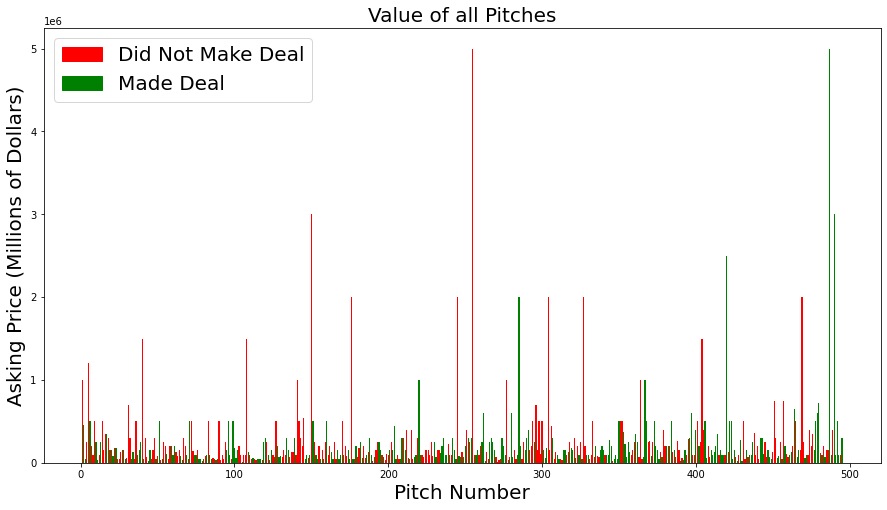

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Pitch Number", fontsize = 20)
plt.title("Value of all Pitches", fontsize = 20)
plt.ylabel("Asking Price (Millions of Dollars)", fontsize = 20)
plt.bar(data['pitchNumber'], data['askedFor'], color = data['madeDeal'])
colors = {'Did Not Make Deal':'red', 'Made Deal':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc = "upper left",  fontsize = 20)
plt.show()

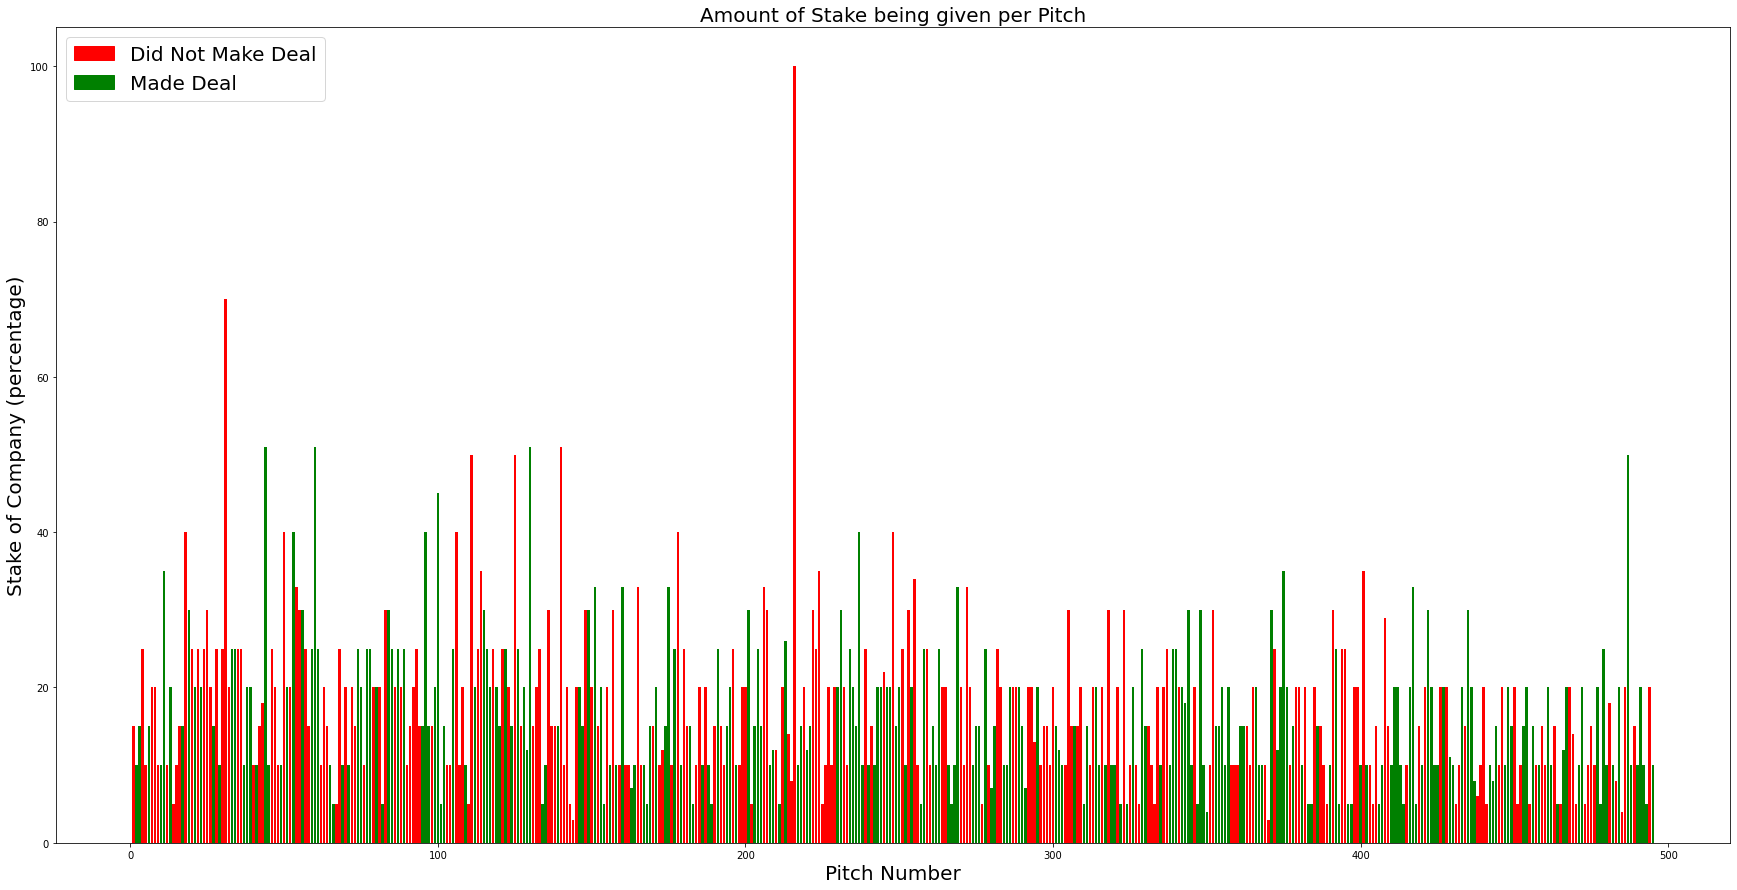

In [ ]:
plt.figure(figsize=(30,15))
plt.xlabel("Pitch Number", fontsize = 20)
plt.title("Amount of Stake being given per Pitch", fontsize = 20)
plt.ylabel("Stake of Company (percentage)", fontsize = 20)
plt.bar(data['pitchNumber'], data['exchangeForStake'], color = data['madeDeal'])
colors = {'Did Not Make Deal':'red', 'Made Deal':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc = "upper left",  fontsize = 20)
plt.show()

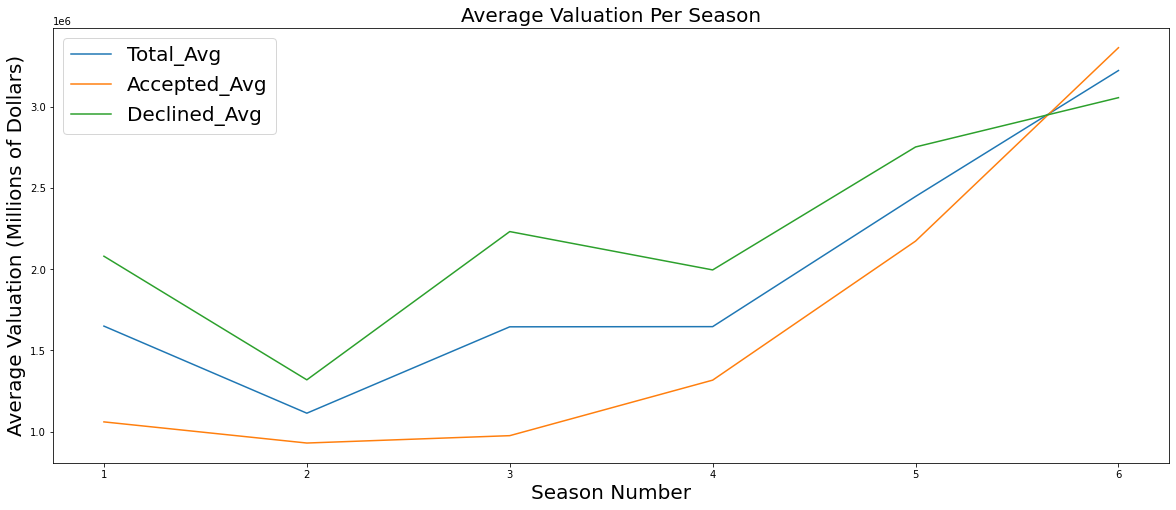

In [ ]:
seasons_avg = []
acceptance_avg = []
decline_avg = []
seasons = data.season.unique()
for curr_season in seasons:
  seasons_avg.append(sum(data[data["season"] == curr_season]['valuation'])/len(data[data["season"] == curr_season]))
for curr_season in seasons:
      tmp = data[data["deal"] == True]
      acceptance_avg.append(sum(tmp[data["season"] == curr_season]['valuation'])/len(tmp[data["season"] == curr_season]))
for curr_season in seasons:
      tmp = data[data["deal"] == False]
      decline_avg.append(sum(tmp[data["season"] == curr_season]['valuation'])/len(tmp[data["season"] == curr_season]))
plt.figure(figsize=(20,8))
plt.xlabel("Season Number", fontsize = 20)
plt.title("Average Valuation Per Season", fontsize = 20)
plt.ylabel("Average Valuation (Millions of Dollars)", fontsize = 20)
plt.plot(seasons, seasons_avg, label="Total_Avg")
plt.plot(seasons, acceptance_avg, label="Accepted_Avg")
plt.plot(seasons, decline_avg, label="Declined_Avg")
plt.legend(fontsize=20)
plt.show()

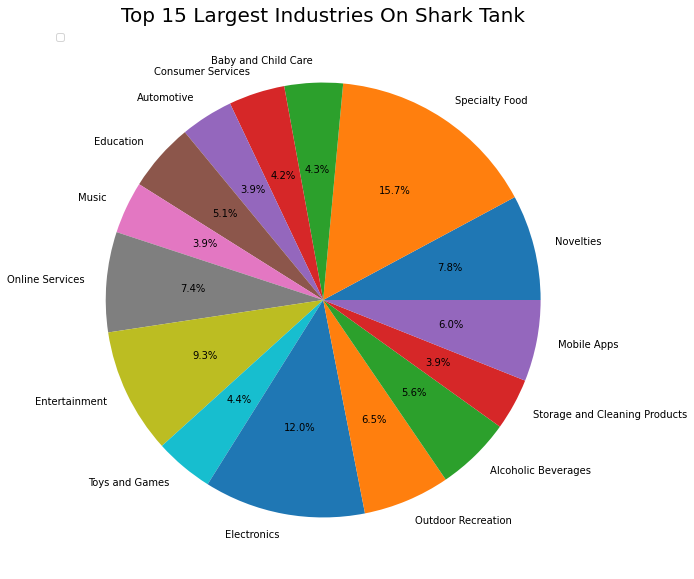

In [ ]:
category = data.category.unique()
category_avg = {key: 0 for key in category}
trim_graph = 0
min_num = 0
for curr_category in category:
  category_avg[curr_category] += (sum(data[data["category"] == curr_category]['valuation']))
while trim_graph <= 38:
  for k,v in category_avg.items():
    min_num = min(category_avg.values())
    if v == min_num:
      category_avg.pop(k)
      trim_graph += 1
      break
plt.figure(figsize=(10,10))
plt.title("Top 15 Largest Industries On Shark Tank", fontsize=20)
plt.legend([category_avg.keys()], loc="upper left")
plt.pie(category_avg.values(),labels=category_avg.keys(),autopct='%1.1f%%')
plt.show()

###**Hypothesis Testing**

Testing if the price of the average pitch has increased compared to inflation with each year

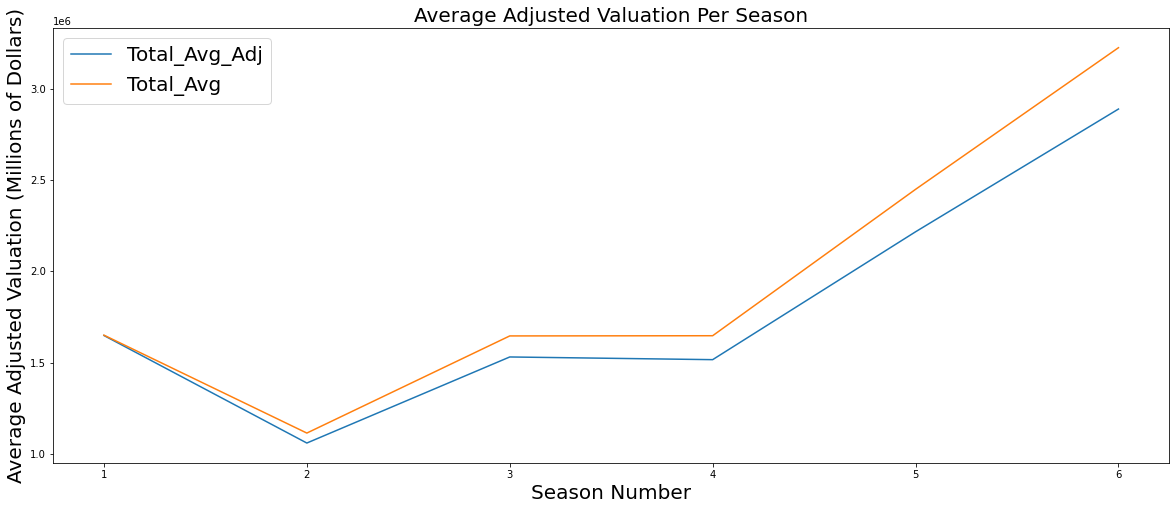

In [ ]:
seasons_avg_adj = []

seasons = data.season.unique()
for curr_season in seasons:
  seasons_avg_adj.append(sum(data[data["season"] == curr_season]['adjustedValuation'])/len(data[data["season"] == curr_season]))
plt.figure(figsize=(20,8))
plt.xlabel("Season Number", fontsize = 20)
plt.title("Average Adjusted Valuation Per Season", fontsize = 20)
plt.ylabel("Average Adjusted Valuation (Millions of Dollars)", fontsize = 20)
plt.plot(seasons, seasons_avg_adj, label="Total_Avg_Adj")
plt.plot(seasons, seasons_avg, label="Total_Avg")
plt.legend(fontsize=20)
plt.show()

In [ ]:
ind = seasons
dep = seasons_avg_adj
ind_ = sm.add_constant(ind)
lm = sm.OLS(dep, ind_).fit()

lm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     7.105
Date:                Thu, 15 Dec 2022   Prob (F-statistic):             0.0561
Time:                        09:20:07   Log-Likelihood:                -85.167
No. Observations:                   6   AIC:                             174.3
Df Residuals:                       4   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.44e+05   4.03e+05      2.094      0.104   -2.75e+05    1.96e+06
x1          2.758e+05   1.03e+05      2.666      0.056   -1.15e+04    5.63e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.610
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.602
Skew:                           0.319   Prob(JB):                        0.740
Kurtosis:                       1.586   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm.summary2().tables[0].iloc[0, 2:]

In [ ]:
noWebsite = []
for result in data[data['website'].isnull() == True]['deal']:
  if result == True:
    noWebsite.append(1)
  else:
    noWebsite.append(0)

hasWebsite = []
for result in data[data['website'].isnull() == False]['deal']:
  if result == True:
    hasWebsite.append(1)
  else:
    hasWebsite.append(0)

print(hasWebsite)

In [ ]:
ztest(noWebsite, hasWebsite, value=0, alternative='two-sided')